In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from IPython.display import display

sns.set_style("darkgrid")

LET'S SEE HOW SYRIAN RESETTLEMENT TO THE TOP THREE NATIONS (GERMANY, CYPRUS, AND THE NETHERLANDS) HAS CHANGED OVER TIME.

In [66]:
df = pd.read_csv("../data/time_series.csv", low_memory=False)

In [67]:
df.head()

,Year,Country / territory of asylum/residence,Origin,Population type,Value
0,1951,Australia,Various/Unknown,Refugees (incl. refugee-like situations),180000
1,1951,Austria,Various/Unknown,Refugees (incl. refugee-like situations),282000
2,1951,Belgium,Various/Unknown,Refugees (incl. refugee-like situations),55000
3,1951,Canada,Various/Unknown,Refugees (incl. refugee-like situations),168511
4,1951,Switzerland,Various/Unknown,Refugees (incl. refugee-like situations),10000


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298441 entries, 0 to 298440
Data columns (total 5 columns):
 #   Column                                   Non-Null Count   Dtype 
---  ------                                   --------------   ----- 
 0   Year                                     298441 non-null  int64 
 1   Country / territory of asylum/residence  298441 non-null  object
 2   Origin                                   298441 non-null  object
 3   Population type                          298441 non-null  object
 4   Value                                    298441 non-null  object
dtypes: int64(1), object(4)
memory usage: 11.4+ MB


In [69]:
df.describe()

,Year
count,298441.000000
mean,2009.952232
std,7.239846
min,1951.000000
25%,2007.000000
50%,2014.000000
75%,2015.000000
max,2016.000000


In [70]:
len(df)

298441

In [71]:
df.columns

Index(['Year', 'Country / territory of asylum/residence', 'Origin',
       'Population type', 'Value'],
      dtype='object')

In [72]:
df

,Year,Country / territory of asylum/residence,Origin,Population type,Value
0,1951,Australia,Various/Unknown,Refugees (incl. refugee-like situations),180000
1,1951,Austria,Various/Unknown,Refugees (incl. refugee-like situations),282000
2,1951,Belgium,Various/Unknown,Refugees (incl. refugee-like situations),55000
3,1951,Canada,Various/Unknown,Refugees (incl. refugee-like situations),168511
4,1951,Switzerland,Various/Unknown,Refugees (incl. refugee-like situations),10000
...,...,...,...,...,...
298436,2016,Zimbabwe,Zimbabwe,Others of concern,128
298437,2016,Zimbabwe,Zimbabwe,Returned IDPs,0
298438,2016,Zimbabwe,Zimbabwe,Refugees (incl. refugee-like situations),0
298439,2016,Zimbabwe,Zimbabwe,Returnees,0


In [73]:
df.rename(columns={"Country / territory of asylum/residence": "Country"}, inplace=True)

In [74]:
df.head()

,Year,Country,Origin,Population type,Value
0,1951,Australia,Various/Unknown,Refugees (incl. refugee-like situations),180000
1,1951,Austria,Various/Unknown,Refugees (incl. refugee-like situations),282000
2,1951,Belgium,Various/Unknown,Refugees (incl. refugee-like situations),55000
3,1951,Canada,Various/Unknown,Refugees (incl. refugee-like situations),168511
4,1951,Switzerland,Various/Unknown,Refugees (incl. refugee-like situations),10000


In [75]:
# pick a random country and see how many refugees went there
df[df['Country'] == 'Brazil'].head(10)

,Year,Country,Origin,Population type,Value
556,1969,Brazil,Various/Unknown,Refugees (incl. refugee-like situations),40000
652,1970,Brazil,Various/Unknown,Refugees (incl. refugee-like situations),40000
763,1971,Brazil,Cuba,Refugees (incl. refugee-like situations),37800
764,1971,Brazil,Various/Unknown,Refugees (incl. refugee-like situations),200
875,1972,Brazil,Cuba,Refugees (incl. refugee-like situations),200
876,1972,Brazil,Various/Unknown,Refugees (incl. refugee-like situations),36800
1004,1973,Brazil,Various/Unknown,Refugees (incl. refugee-like situations),35200
1105,1974,Brazil,Various/Unknown,Refugees (incl. refugee-like situations),34000
1207,1975,Brazil,Various/Unknown,Refugees (incl. refugee-like situations),32000
1325,1976,Brazil,Various/Unknown,Refugees (incl. refugee-like situations),30000


In [76]:
df[df.Country == "United States of America"].head(10)

,Year,Country,Origin,Population type,Value
20,1951,United States of America,Various/Unknown,Refugees (incl. refugee-like situations),350000
37,1952,United States of America,Various/Unknown,Refugees (incl. refugee-like situations),500000
54,1953,United States of America,Various/Unknown,Refugees (incl. refugee-like situations),500000
74,1954,United States of America,Various/Unknown,Refugees (incl. refugee-like situations),500000
90,1955,United States of America,Various/Unknown,Refugees (incl. refugee-like situations),500000
106,1956,United States of America,Various/Unknown,Refugees (incl. refugee-like situations),500000
122,1957,United States of America,Various/Unknown,Refugees (incl. refugee-like situations),500000
140,1958,United States of America,Various/Unknown,Refugees (incl. refugee-like situations),500000
158,1959,United States of America,Various/Unknown,Refugees (incl. refugee-like situations),500000
177,1960,United States of America,Various/Unknown,Refugees (incl. refugee-like situations),500000


In [77]:
df[df.Country == "Canada"].head(10)

,Year,Country,Origin,Population type,Value
3,1951,Canada,Various/Unknown,Refugees (incl. refugee-like situations),168511
23,1952,Canada,Various/Unknown,Refugees (incl. refugee-like situations),154828
40,1953,Canada,Various/Unknown,Refugees (incl. refugee-like situations),107004
57,1954,Canada,Various/Unknown,Refugees (incl. refugee-like situations),75828
77,1955,Canada,Various/Unknown,Refugees (incl. refugee-like situations),52551
93,1956,Canada,Various/Unknown,Refugees (incl. refugee-like situations),17485
109,1957,Canada,Various/Unknown,Refugees (incl. refugee-like situations),46334
125,1958,Canada,Various/Unknown,Refugees (incl. refugee-like situations),46908
143,1959,Canada,Various/Unknown,Refugees (incl. refugee-like situations),47934
161,1960,Canada,Various/Unknown,Refugees (incl. refugee-like situations),48629


In [78]:
labels = ['year', 'country_of_residence', 'country_of_origin', 'population_type', 'population_count']
df.columns = labels

In [79]:
df.head()

,year,country_of_residence,country_of_origin,population_type,population_count
0,1951,Australia,Various/Unknown,Refugees (incl. refugee-like situations),180000
1,1951,Austria,Various/Unknown,Refugees (incl. refugee-like situations),282000
2,1951,Belgium,Various/Unknown,Refugees (incl. refugee-like situations),55000
3,1951,Canada,Various/Unknown,Refugees (incl. refugee-like situations),168511
4,1951,Switzerland,Various/Unknown,Refugees (incl. refugee-like situations),10000


In [84]:
df = df.fillna(value = "")

In [85]:
df = df.replace(['*'], [''])

NOW WE FOCUS ON THE SYRIAN RESETTLEMENT ISSUE

In [86]:
syrian_resettlement = df[df.country_of_residence == 'Syrian Arab Rep.']
print(syrian_resettlement.head())

      year country_of_residence country_of_origin  \
1676  1978     Syrian Arab Rep.   Various/Unknown   
1861  1979     Syrian Arab Rep.          Ethiopia   
2088  1980     Syrian Arab Rep.          Ethiopia   
2321  1981     Syrian Arab Rep.          Ethiopia   
2322  1981     Syrian Arab Rep.              Iraq   

                               population_type population_count  
1676  Refugees (incl. refugee-like situations)              170  
1861  Refugees (incl. refugee-like situations)              200  
2088  Refugees (incl. refugee-like situations)              350  
2321  Refugees (incl. refugee-like situations)              600  
2322  Refugees (incl. refugee-like situations)              400  


In [87]:
def select_country(country):
    """This function returns a information about a country"""
    return syrian_resettlement.query(f"country_of_residence == '{country}' and population_type == 'Asylum-seekers'")

In [88]:
germany = syrian_resettlement.query("country_of_residence == 'Germany' and population_type == 'Asylum-seekers'")
cyprus = syrian_resettlement.query("country_of_residence == 'Cyprus' and population_type == 'Asylum-seekers'")
netherlands = syrian_resettlement.query("country_of_residence == 'Netherlands' and population_type == 'Asylum-seekers'")
ireland = syrian_resettlement.query("country_of_residence == 'Ireland' and population_type == 'Asylum-seekers'")
ukraine = syrian_resettlement.query("country_of_residence == 'Ukraine' and population_type == 'Asylum-seekers'")
sweden = syrian_resettlement.query("country_of_residence == 'Sweden' and population_type == 'Asylum-seekers'")
france = syrian_resettlement.query("country_of_residence == 'France' and population_type == 'Asylum-seekers'")
belgium = syrian_resettlement.query("country_of_residence == 'Belgium' and population_type == 'Asylum-seekers'")
norway = syrian_resettlement.query("country_of_residence == 'Norway' and population_type == 'Asylum-seekers'")
denmark = syrian_resettlement.query("country_of_residence == 'Denmark' and population_type == 'Asylum-seekers'")
brazil = syrian_resettlement.query("country_of_residence == 'Brazil' and population_type == 'Asylum-seekers'")
canada = syrian_resettlement.query("country_of_residence == 'Canada' and population_type == 'Asylum-seekers'")

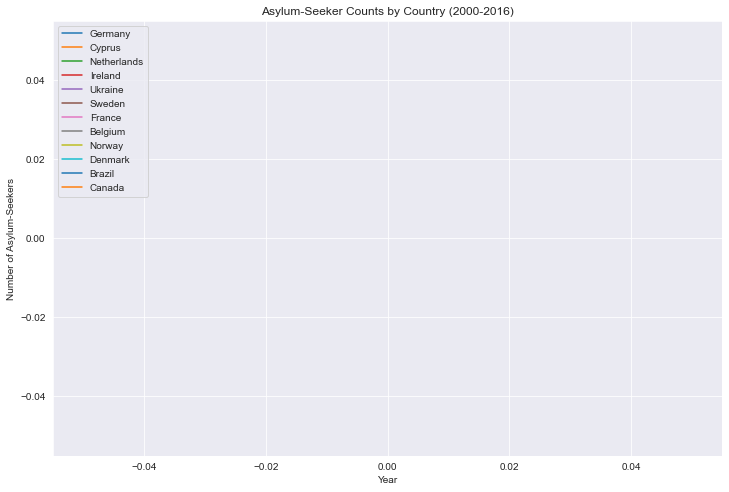

In [89]:
fig = plt.figure(figsize=(12, 8))
ax = plt.axes()

plt.plot(germany.year, germany.population_count, label='Germany')
plt.plot(cyprus.year, cyprus.population_count, label='Cyprus')
plt.plot(netherlands.year, netherlands.population_count, label='Netherlands')
plt.plot(ireland.year, ireland.population_count, label='Ireland')
plt.plot(ukraine.year, ukraine.population_count, label='Ukraine')
plt.plot(sweden.year, sweden.population_count, label='Sweden')
plt.plot(france.year, france.population_count, label='France')
plt.plot(belgium.year, belgium.population_count, label='Belgium')
plt.plot(norway.year, norway.population_count, label='Norway')
plt.plot(denmark.year, denmark.population_count, label='Denmark')
plt.plot(brazil.year, brazil.population_count, label='Brazil')
plt.plot(canada.year, canada.population_count, label='Canada')

plt.title("Asylum-Seeker Counts by Country (2000-2016)")
ax.legend(loc='upper left')
plt.xlabel("Year")
plt.ylabel("Number of Asylum-Seekers")
plt.show()
